## **LINEAR CLASSIFICATION**

# **Data preprocessing**

**Import the libraries**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

**Load the dataset**

In [28]:
# Load the dataset
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

**Checking for missing values**

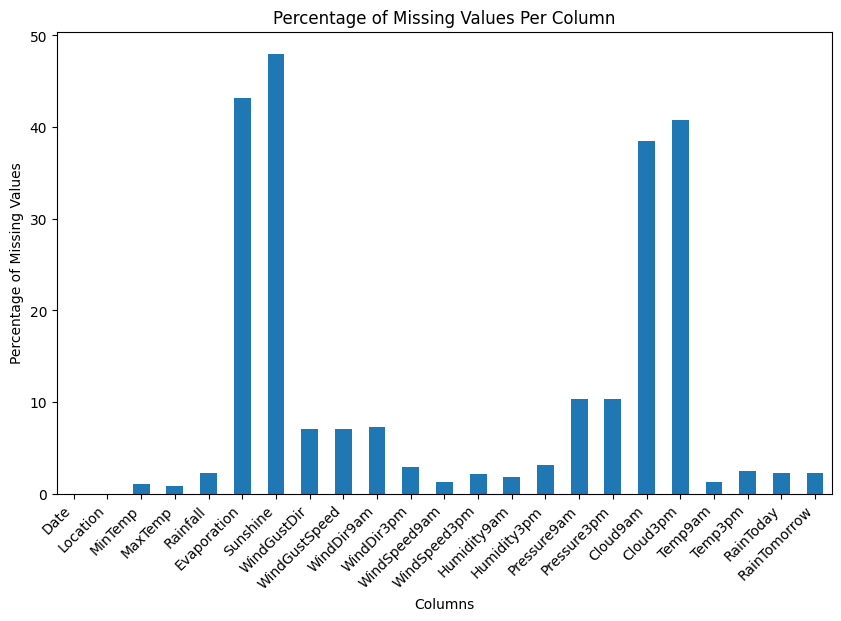

In [29]:
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
# Plotting
missing_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()

**Missing value percentage**

In [30]:
# Display missing value percentages
print("\n\nPercentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


**After handling the missing values**

In [31]:
# Remove columns with very high missing values
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Impute missing values in numeric columns with mean
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values in categorical columns with mode
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if any missing values remain
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column after handling:")
print(missing_values_percentage)


Percentage of missing values in each column after handling:
Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64


**Listing the categorical and numerical features**

In [32]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# List numerical features (excluding object data type, assuming they are numerical)
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)

Categorical features:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical features:
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


**Converting date to datetime**

In [33]:


# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the numerical representation of the date, such as the number of days since a reference date
df['Date_numeric'] = (df['Date'] - df['Date'].min()).dt.days

# Apply Min-Max scaling to the numerical representation of the date
df['Date_scaled'] = min_max_scaler.fit_transform(df[['Date_numeric']])

# Drop the original date column and the temporary numerical representation column if needed
df.drop(['Date', 'Date_numeric'], axis=1, inplace=True)

**Label encoding for RainToday and RainTomorrow fetaures**

In [34]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'RainToday' and 'RainTomorrow'
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

**One-Hot encoding for 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'**

In [35]:
# List of categorical features other than RainToday and RainTomorrow
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Display the resulting DataFrame
print(df)


        MinTemp    MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0          13.4  22.900000       0.6       44.00000          20.0   
1           7.4  25.100000       0.0       44.00000           4.0   
2          12.9  25.700000       0.0       46.00000          19.0   
3           9.2  28.000000       0.0       24.00000          11.0   
4          17.5  32.300000       1.0       41.00000           7.0   
...         ...        ...       ...            ...           ...   
145455      2.8  23.400000       0.0       31.00000          13.0   
145456      3.6  25.300000       0.0       22.00000          13.0   
145457      5.4  26.900000       0.0       37.00000           9.0   
145458      7.8  27.000000       0.0       28.00000          13.0   
145459     14.9  23.221348       0.0       40.03523          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0               24.0         71.0         22.0       1007.7       1007.1  ...   
1        

**Scaling Numerical Features:**

*   Both normalization (MinMax scaling) and standardization (Z-score scaling) were applied to numerical features.
*   MinMax scaling scales the numerical features to a fixed range (typically 0 to 1).
*   Standard scaling scales the numerical features to have a mean of 0 and a standard deviation of 1.








In [36]:

# Define the numerical features
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Initialize MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling (Normalization)
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Initialize StandardScaler for standardization
std_scaler = StandardScaler()

# Apply Standard scaling (Standardization)
df[numerical_cols] = std_scaler.fit_transform(df[numerical_cols])

# Display the resulting DataFrame
print(df)

         MinTemp       MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.189447 -4.533631e-02 -0.210072       0.302234      0.672222   
1      -0.753101  2.650431e-01 -0.281650       0.302234     -1.133438   
2       0.110901  3.496920e-01 -0.281650       0.454694      0.559368   
3      -0.470337  6.741796e-01 -0.281650      -1.222364     -0.343462   
4       0.833521  1.280830e+00 -0.162353       0.073544     -0.794877   
...          ...           ...       ...            ...           ...   
145455 -1.475720  2.520446e-02 -0.281650      -0.688755     -0.117754   
145456 -1.350047  2.932594e-01 -0.281650      -1.374824     -0.117754   
145457 -1.067283  5.189899e-01 -0.281650      -0.231375     -0.569169   
145458 -0.690264  5.330980e-01 -0.281650      -0.917445     -0.117754   
145459  0.425083  8.285832e-16 -0.281650       0.000000      0.333660   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0           0.612323     0.112395    -1.44

**Displaying the box plot before Handling outliers**

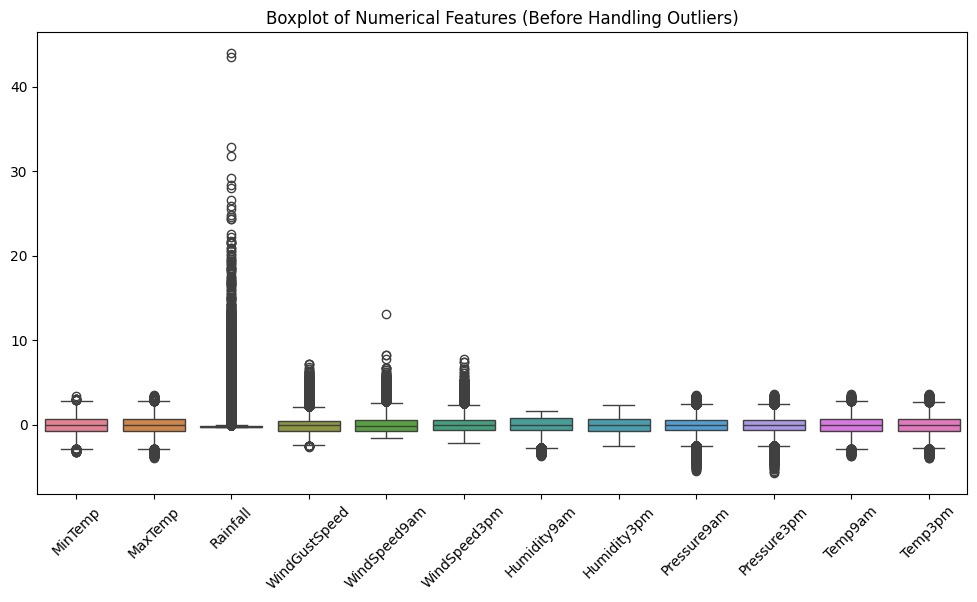

In [37]:
# Display box plot before handling outliers
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (Before Handling Outliers)")
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

**Outlier Handling using IQR method**

In [38]:

for col in numerical_cols:
    # Calculate the IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers by clipping values
    df[col] = np.clip(df[col], lower_bound, upper_bound)

**Displaying the  box plot after handling outliers**

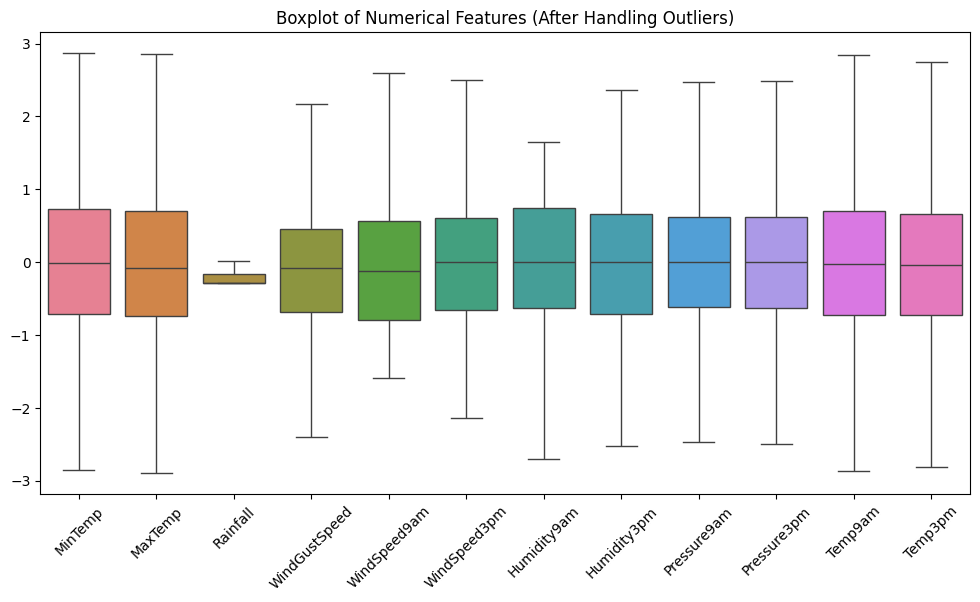

In [39]:
# Display box plot after handling outliers
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
sns.boxplot(data=df[numerical_cols ])
plt.xticks(rotation=45)
plt.show()

**Splitting the dataset into train and test and saving the preprocessed dataset**

In [40]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the preprocessed DataFrame to a CSV file
df.to_csv('preprocessed_data.csv', index=False)

# Save the preprocessed training and testing sets to CSV files
train_df.to_csv('preprocessed_train_data.csv', index=False)
test_df.to_csv('preprocessed_test_data.csv', index=False)

# **Linear Classification**

**Loading the preprocessed dataset**

In [41]:
dataset = pd.read_csv('preprocessed_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [42]:
#Split the data into features (X) and target variable (y)
X = dataset.drop(columns=['RainTomorrow'])
y = dataset['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Fitting the Logistic Regression model**

In [43]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with appropriate solver and max_iter
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Fit logistic regression model using scaled training data
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

**Fitting the Naive Bayes Classifier**

In [44]:
from sklearn.naive_bayes import GaussianNB

# Fit Naïve Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

**Summarize the Performance Using Confusion Matrix**

In [45]:
from sklearn.metrics import confusion_matrix


# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_nb = naive_bayes_model.predict(X_test)



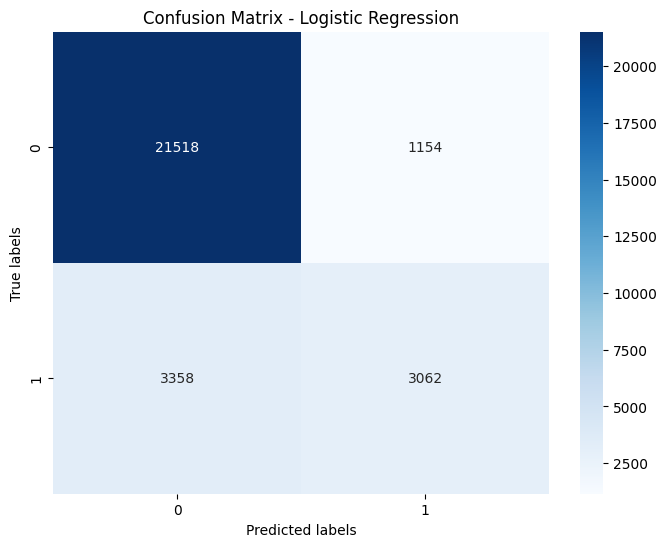

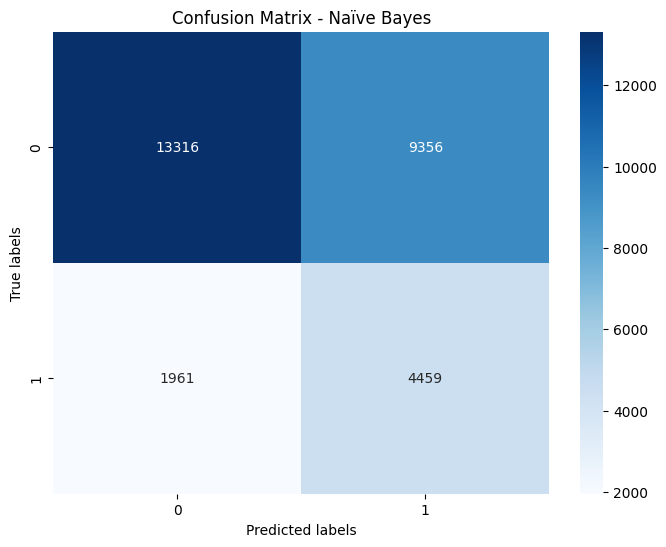

In [46]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, title="Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_test, y_pred_nb, title="Confusion Matrix - Naïve Bayes")

**Classification Metrics**

In [47]:
# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Naïve Bayes Classifier Classification Report:")
print(classification_report(y_test, y_pred_nb))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.73      0.48      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092

Naïve Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.59      0.70     22672
           1       0.32      0.69      0.44      6420

    accuracy                           0.61     29092
   macro avg       0.60      0.64      0.57     29092
weighted avg       0.75      0.61      0.64     29092




*  **Logistic Regression** outperforms Naïve Bayes in terms of accuracy, precision, recall, and F1-score for class 1. **Accuracy : 84 %**
*   **Naïve Bayes** has a higher recall for class 1, suggesting it captures more instances of this class, but at the expense of precision.**Accuracy : 61 %**




**ROC curve & ROC-AUC score to improve the performance**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


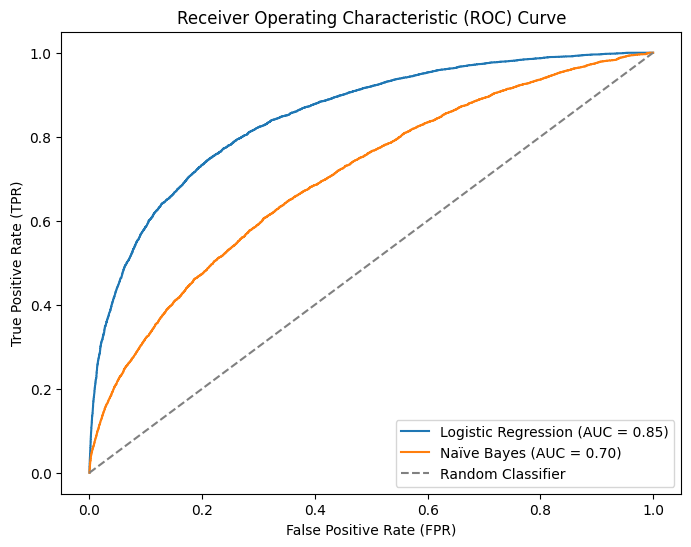

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for positive class
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_prob_nb = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)

# Calculate ROC curve and AUC score for Naïve Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


The given ROC Curve and AUC values illustrate the performance of Logistic Regression, Naïve Bayes, and a Random Classifier in classifying data. The Logistic Regression model demonstrates the best overall performance, with an AUC value of 0.85. In contrast, the Naïve Bayes model has a lower AUC value of 0.70, indicating comparatively weaker performance. The Random Classifier has the lowest AUC, near 0.5, indicating the poorest performance. The ROC Curve comparison shows that at the True Positive Rate of 1.0, the False Positive Rate of the Logistic Regression model is lower than the Naïve Bayes model, indicating a better overall balance between the positive and negative predictions

**Performing  k-fold cross validation**

In [49]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Perform k-fold cross-validation for Naïve Bayes
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores for Logistic Regression:", logistic_cv_scores)
print("Mean Cross-Validation Score for Logistic Regression:", logistic_cv_scores.mean())
print("\nCross-Validation Scores for Naïve Bayes Classifier:", naive_bayes_cv_scores)
print("Mean Cross-Validation Score for Naïve Bayes Classifier:", naive_bayes_cv_scores.mean())


Cross-Validation Scores for Logistic Regression: [0.84802784 0.84321561 0.84592249 0.84527134 0.84497057]
Mean Cross-Validation Score for Logistic Regression: 0.8454815694930928

Cross-Validation Scores for Naïve Bayes Classifier: [0.61046662 0.61863023 0.61381799 0.61195377 0.60494994]
Mean Cross-Validation Score for Naïve Bayes Classifier: 0.611963709750865


**Performance Metric from Single Train-Test Split:**
- Logistic Regression: 0.85
- Naïve Bayes Classifier: 0.62

**Mean Cross-Validation Scores:**
- Logistic Regression: 0.85
- Naïve Bayes Classifier: 0.61



The mean cross-validation score represents the average performance of the model across all folds. In this case, the Logistic Regression model has a higher mean cross-validation score (approximately 0.8455) compared to the Naïve Bayes Classifier (approximately 0.6120), indicating that the Logistic Regression model performs better on average across different subsets of the data.

**Tuning  the regularization hyperparameter to fix the problem of Overfitting or underfitting**

**Optimize the hyperparameters using scikit-learn’s GridSearchCV function**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
logistic_model = LogisticRegression(max_iter=1000)
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Perform grid search with cross-validation to tune hyperparameters
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']

# Create a new logistic regression model with the best hyperparameters
tuned_logistic_model = LogisticRegression(C=best_C)

# Fit the tuned model on the training data
tuned_logistic_model.fit(X_train_scaled, y_train)

# Evaluate the tuned model on the training and validation/test data
train_accuracy = tuned_logistic_model.score(X_train_scaled, y_train)
test_accuracy = tuned_logistic_model.score(X_test_scaled, y_test)
print("Best Hyperparameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Validation/Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Training Accuracy: 0.8459628076447133
Validation/Test Accuracy: 0.8449058160318988


The **training accuracy** achieved with these hyperparameters is approximately **84.60%,** and the **validation/test accuracy** is around **84.49%.**



The model performs consistently well on both the training and validation/test datasets, indicating that it generalizes well and is not significantly overfitting or underfitting the data. However, it's important to note that **the difference between training and validation/test accuracies is relatively small, indicating a well-fit model**.